In [1]:
import matplotlib.pyplot as plt; 
import numpy as np; 
import os; 

In [2]:
# Make tables of CDC data for each cancer type, for each data type
def parse_data_CDC(file, cancer_type, metric_index, title, percentage):
    
    # Build filename to look in the Data archive
    filename = os.path.join("Data", file)
    
    # Define local variables
    data = []; cancer=[]; metric=[]; year=[]; all_races=[]; caucasian=[];african_american=[];asian=[];hispanic=[];native_american=[];
    
    # Open CDC files and read in all lines
    f = open(filename,'r')
    for line in f: data.append(line)
    f.close()   
    
    # Parse data into variables
    for i in range(len(data)):
        x1,x2,x3,x4,x5,x6,x7,x8,x9 = data[i].split(",")  
        
        if x1 == cancer_type:
            if x2 == metric_index:
                year.append(int(x3)) 
                all_races.append(int(x4))
                
                # Calculate percentage if necessary. 
                if percentage == "percentage":
                    year_sum = int(x5)+int(x6)+int(x7)+int(x8)+int(x9) 
                else:
                    year_sum = 1; 
                    
                caucasian.append(int(x5)/year_sum)
                african_american.append(int(x6)/year_sum)
                asian.append(int(x7)/year_sum) 
                hispanic.append(int(x8)/year_sum) 
                native_american.append(int(x9)/year_sum) 
    
    # Build table of all percentages
    table = np.array([year, caucasian, african_american, asian, hispanic, native_american])
    table = np.transpose(table)
    filename = os.path.join("Tables", title)
    
    # Open file to clear contents, then write the table
    open(filename, "w").close()
    np.savetxt(filename, table, delimiter=",") 
        
parse_data_CDC('v01_CDC.csv', '2', '3','Breast Cancer CDC Incidence by Ethnicity by Count', 'count')
parse_data_CDC('v01_CDC.csv', '2', '4','Breast Cancer CDC Morbidity by Ethnicity by Count', 'count')
parse_data_CDC('v01_CDC.csv', '3', '3','Prostate Cancer CDC Incidence by Ethnicity by Count', 'count')
parse_data_CDC('v01_CDC.csv', '3', '4','Prostate Cancer CDC Morbidity by Ethnicity by Count', 'count')
parse_data_CDC('v01_CDC.csv', '4', '3','Lung Cancer CDC Incidence by Ethnicityt by Count', 'count')
parse_data_CDC('v01_CDC.csv', '4', '4','Lung Cancer CDC Morbidity by Ethnicity by Count', 'count')
parse_data_CDC('v01_CDC.csv', '2', '3','Breast Cancer CDC Incidence by Ethnicity by Percentage', 'percentage')
parse_data_CDC('v01_CDC.csv', '2', '4','Breast Cancer CDC Morbidity by Ethnicity by Percentage', 'percentage')
parse_data_CDC('v01_CDC.csv', '3', '3','Prostate Cancer CDC Incidence by Ethnicity by Percentage', 'percentage')
parse_data_CDC('v01_CDC.csv', '3', '4','Prostate Cancer CDC Morbidity by Ethnicity by Percentage', 'percentage')
parse_data_CDC('v01_CDC.csv', '4', '3','Lung Cancer CDC Incidence by Ethnicity by Percentage', 'percentage')
parse_data_CDC('v01_CDC.csv', '4', '4','Lung Cancer CDC Morbidity by Ethnicity by Percentage', 'percentage')


In [3]:
# Program to fil in data for all years
def fill_in_all_years(list_year, list_data):
    
    year_min = 1999; 
    year_max = 2013; 
    
    complete_list_year = []; complete_list_data = []; i = year_min; 
    while i <= year_max: 
        complete_list_year.append(i)
        complete_list_data.append(0) 
        i = i+1; 
    
    for i in range(len(complete_list_year)):
        for j in range(len(list_year)):
            if complete_list_year[i] == list_year[j]:
                complete_list_data[i] = list_data[j]
    
    return(complete_list_year, complete_list_data)

def parse_data_count(file, cancer_type, save_to_filename):
    
    filename = os.path.join("Data", file)
     
    data = []  
    caucasian = []; african_american = []; asian =[]; hispanic =[]; native_american = []; unknown = [];
    year_caucasian = []; year_african_american = []; year_asian = []; year_hispanic = []; year_native_american = []; year_unknown = [];
    count_caucasian = 0; count_african_american = 0; count_asian = 0; count_hispanic = 0; count_native_american = 0; count_unknown = 0; 
    
    f = open(filename,'r')
    for line in f: data.append(line)
    f.close()   
    
    for i in range(len(data)):
        x1,x2,x3,x4,x5 = data[i].split(",") 
        
        if x3 == cancer_type: 
            
            x1 = int(x1); x2 = int(x2); x4 = int(x4); x5 = int(x5);
            
            if x2 == 6:
                unknown.append(x5); year_unknown.append(x4); count_unknown = count_unknown + x5;  
            if x2 == 5:
                caucasian.append(x5); year_caucasian.append(x4); count_caucasian = count_caucasian + x5;
            if x2 == 2:
                african_american.append(x5); year_african_american.append(int(x4)); count_african_american = count_african_american + x5;
            if x2 == 1:
                asian.append(x5); year_asian.append(x4); count_asian = count_asian + x5;
            if x2 == 3:
                hispanic.append(x5); year_hispanic.append(x4); count_hispanic = count_hispanic + x5;                       
            if x2 == 4:
                native_american.append(x5); year_native_american.append(x4); count_native_american = count_native_american + x5;
                
    # Fill in data points for all years
    year_caucasian, caucasian = fill_in_all_years(year_caucasian, caucasian)
    year_african_american, african_american = fill_in_all_years(year_african_american, african_american)
    year_asian, asian = fill_in_all_years(year_asian, asian)
    year_hispanic, hispanic = fill_in_all_years(year_hispanic, hispanic)
    year_native_american, native_american = fill_in_all_years(year_native_american, native_american)
    
    # Build table of all percentages
    table = np.array([year_caucasian, caucasian, african_american, asian, hispanic, native_american])
    table = np.transpose(table)
    filename = os.path.join("Tables", save_to_filename)
    
    # Open file to clear contents, then write the table
    open(filename, "w").close()
    np.savetxt(filename, table, delimiter=",") 
    
parse_data_count('v01_PuCo.csv', '2', "Breast Cancer Publication by Ethnicity")
parse_data_count('v01_PaCo.csv', '2', "Breast Cancer Patent by Ethnicity")
parse_data_count('v01_PuCo.csv', '3', "Prostate Cancer Publication by Ethnicity")
parse_data_count('v01_PaCo.csv', '3', "Prostate Cancer Patent by Ethnicity")
parse_data_count('v01_PuCo.csv', '4', "Lung Cancer Publication by Ethnicity")
parse_data_count('v01_PaCo.csv', '4', "Lung Cancer Patent by Ethnicity")


In [4]:
# Read data from ethnicity tables

def read_data_table(filename, column):
    filename = os.path.join("Tables", filename)
    
    data = []
    f = open(filename,'r')
    for line in f: data.append(line)
    f.close()  
    
    a = []; x = [0,0,0,0,0,0]
    for i in range(len(data)): 
        x = data[i].split(",")
        a.append(x[column])
    return(a)


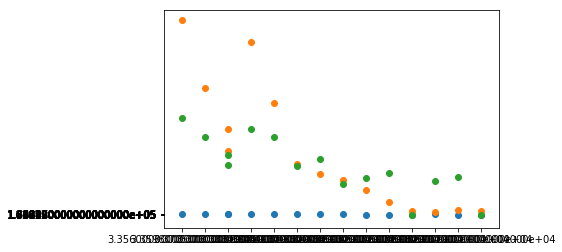

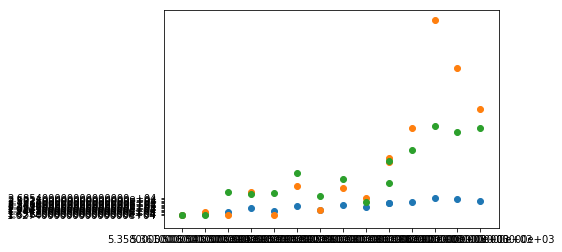

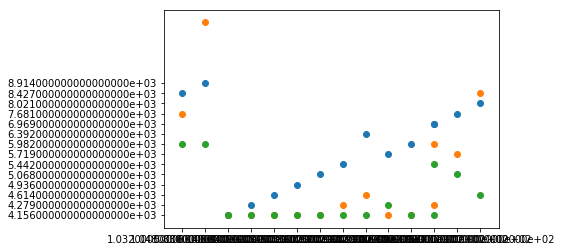

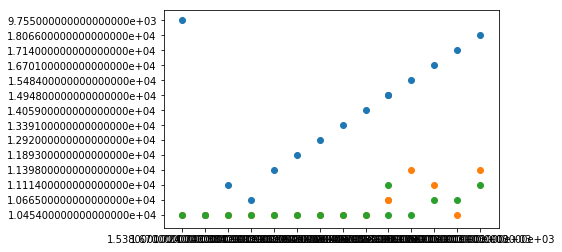

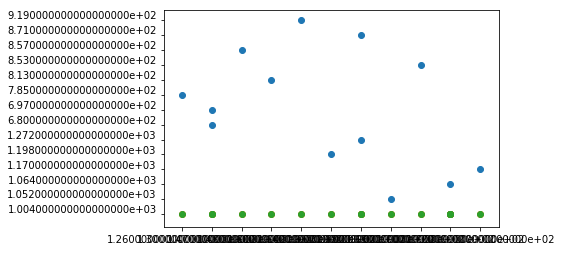

In [5]:

i = 1;

while i<=5:

    a = read_data_table("Breast Cancer CDC Incidence by Ethnicity by Count", i)
    b = read_data_table("Breast Cancer CDC Morbidity by Ethnicity by Count", i)
    c = read_data_table("Breast Cancer Publication by Ethnicity", i)
    d = read_data_table("Breast Cancer Patent by Ethnicity", i)

    plt.scatter(b, a)
    plt.scatter(b, c)
    plt.scatter(b, d)
    plt.show()
    
    i=i+1
    
    